In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
import numpy as np
import cv2
import shap

In [398]:
def color(m, i):
    coef = reg.coef_[int(i)]
    mean = sum(reg.coef_)/len(reg.coef_)
    for chunk in m: 
        for pixel in chunk:
            pixel[0] = 0
            pixel[1] = 0
            pixel[2] = 0
            c, s = reg_color(coef, mean)
            pixel[c] = s
         

      

def reg_color(coef, mean):
    if coef >= 0 :
        #red means coefficient is positive. removing it increases conf
        return 0, abs(coef-mean)*255
    if coef < 0:
        #blue means coefficient is negative, removing it reduces conf
        return 2, abs(coef-mean)*255

In [450]:
def map_confidence_to_chunk(responses, filename):
    conf = {}
    for r in responses:
        key = r['file_name'].replace(filename,'')
        try:
            sc = r['all_bboxes'][0]['confidence_score']
        except:
            sc = 0.01
        conf[key] = sc
    return conf

def color_chunks(original_image_path, conf):
    org = cv2.imread(original_image_path, cv2.IMREAD_COLOR)
    org = cv2.cvtColor(org, cv2.COLOR_BGR2RGB)
    n = 10
    im = org.copy()
    M = im.shape[0]//n
    N = im.shape[1]//n
    tile_coord = [[x,x+M,y,y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]
    response =[]
    max_conf = max(conf.values())
    for i,matrix in enumerate(tile_coord):
        a,b,c,d = matrix
        # im[a:b,c:d] = reg_color(i)
        color(im[a:b,c:d], i )
        #conf_color(conf[str(i)], max_conf)
        
    plt.imshow(org)
    plt.imshow(im, alpha=0.5)
    # plt.savefig(save_as)
        
def conf_color(x, max_v): 
    return (max_v-x)*255/max_v


In [303]:

responses = pd.read_pickle('python_backend/response')
conf = map_confidence_to_chunk(responses,'plate.png')

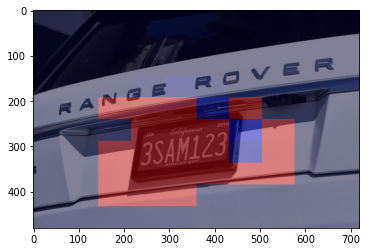

In [451]:
color_chunks('C:\\Users\\reonh\\Documents\\NUS\\AY2022_S1\\Capstone\\capstone_21\\python_backend\\database\\lpdlprnet\\plate.jpg', conf)

In [442]:
images = range(len(conf))
diy = []
y = []
for k,v in conf.items():
    sample = [1 if str(x) != k else 0 for x in images]
    diy.append(sample)
    y.append(v)


In [378]:
x = pd.DataFrame(df)

In [274]:

reg = LinearRegression().fit(x, y)

In [448]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
enc = OneHotEncoder()
df = pd.DataFrame([int(k) for k,v in conf.items()])
y = [v for v in conf.values()]
X = 1-enc.fit_transform(df).toarray()
reg = LinearRegression().fit(X, y)


In [259]:
explainer = shap.KernelExplainer(reg.predict, x)

shap_values = explainer.shap_values(x)


  0%|          | 0/100 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  1%|          | 1/100 [00:01<02:14,  1.36s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipelin

TypeError: 'float' object is not subscriptable

In [200]:
reg.coef_

array([-0.40490703, -0.40490703, -0.40490703, -0.40490703, -0.40490703,
       -0.40490703, -0.40490703, -0.40490703, -0.40490703, -0.40490703,
       -0.40490703, -0.40490703, -0.40490703, -0.40490703, -0.40490703,
       -0.40490703, -0.40490703, -0.40490703, -0.40490703, -0.40490703,
       -0.40490703, -0.40490697, -0.40490875, -0.40502743, -0.40474329,
       -0.40438525, -0.40498326, -0.40491013, -0.40490703, -0.40490703,
       -0.40490703, -0.40491638, -0.40912477, -0.44928709, -0.57462732,
       -0.47332654, -0.39140985, -0.40409396, -0.40490703, -0.40490703,
       -0.40490703, -0.40572641,  0.50515468,  0.50515468,  0.50515468,
       -0.78656403,  0.50515468, -0.40656237, -0.40490703, -0.40490703,
       -0.40490703, -0.4039124 , -0.49740294,  0.50515468,  0.50515468,
        0.50515468, -0.93634192,  0.50515468, -0.40490703, -0.40490703,
       -0.40490703, -0.40349964,  0.50515468,  0.50515468,  0.50515468,
        0.50515468, -0.75930861,  0.50515468, -0.40490703, -0.40